<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Solucion_TAREA_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [1]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  10.7M      0 --:--:-- --:--:-- --:--:-- 10.7M


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [3]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,Right,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [5]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [6]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes. 

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,48,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [7]:
t_df = fifa_df.dropna(axis=0)

Verifica que no hay más datos faltantes:

In [9]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [11]:
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis. 

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones). 

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [ ]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


In [ ]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[0]).count()

,Wage
Wage,
€,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[0]).count()

,Value
Value,
€,17918


In [12]:
def currency_to_numeric(currency):
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  #TIP 1: estoy procesando cadenas
  #TIP 2: puedo usar slicing
  #TIP 3: lógica de la solución
  # 1. Necesito saber si el último caracter es 'K' o 'M'
  # 2. Si lo es, entonces saco del dicccionario el valor del multiplo
  # 3. En cualquier caso sólo me quedo con los caracteres después del primero (simbolo de la moneda)

  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0
  # try:
  #   if float(currency[0]) != 0:
  #     print("el primer caracter es un número")
  # except:
  #   print("el primer caracter no es un número")
  # if currency[0].isdigit() == True:
  #   print("el primer caracter es un número")
  # else:
  #   print("el primer caracter no es un número")
  multiplo = currency[-1]
  valor = currency[1:]
  if multiplo in symbols:
    numeric = float(valor[:-1])*symbols[multiplo]
  else:
    numeric = float(valor)
  
  return numeric

Prueba tu función:

In [ ]:
print(currency_to_numeric("$20"))
print(currency_to_numeric("$50K"))

20.0
50000.0


In [13]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [14]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,Right,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,Right,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,Right,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,Right,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador. 


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [15]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0  14036      0 --:--:-- --:--:-- --:--:-- 14036


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [16]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


In [ ]:
positions_df.shape

(36, 2)

Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [17]:
merged_df = fifa_df.merge(positions_df,\
                          how='inner',\
                          left_on='Position',\
                          right_on='Abbreviation')

In [18]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,RF,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,RF,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,RF,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,RF,Right Forward
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,Left,RF,78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,RF,Right Forward
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,Left,RF,75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,RF,Right Forward


In [19]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [20]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"

Muestra la columna actualizada:

In [21]:
merged_df[["Position"]].head(3)

,Position
0,Right Forward (RF)
1,Right Forward (RF)
2,Right Forward (RF)


Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [22]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [23]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [24]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [25]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,Right,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,Right,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,Left,Right Forward (RF),78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,Left,Right Forward (RF),75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [ ]:
fifa_df.sort_values("Value",ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
2146,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,Right,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4512,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,Right,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0
4899,183277,E. Hazard,Belgium,Chelsea,10.0,93000000.0,340000.0,27,5'8,163lbs,Right,Left Forward (LF),91,91,79.0,42.0,84.0,82.0,94.0,90.0,9.0
4900,211110,P. Dybala,Argentina,Juventus,21.0,89000000.0,205000.0,24,5'10,165lbs,Left,Left Forward (LF),89,94,84.0,36.0,81.0,81.0,90.0,86.0,5.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [27]:
fifa_df.sort_values("Wage",ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,Left,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4914,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,Right,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
4513,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,Right,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0
16,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,Right,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
5115,155862,Sergio Ramos,Spain,Real Madrid,15.0,51000000.0,380000.0,32,6'0,181lbs,Right,Right Center Back (RCB),91,91,72.0,84.0,74.0,79.0,71.0,77.0,9.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [28]:
fifa_df["Potential left"] = fifa_df['Potential']-fifa_df['Overall']
fifa_df.sort_values("Potential left",ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
16346,238758,D. Campbell,Scotland,Aberdeen,24.0,60000.0,1000.0,17,6'0,134lbs,Right,Central Midfield (CM),50,76,46.0,35.0,49.0,59.0,64.0,45.0,12.0,26
1827,244592,J. von Moos,Switzerland,FC Basel 1893,18.0,280000.0,2000.0,17,5'10,157lbs,Left,Striker (ST),58,84,50.0,26.0,35.0,71.0,61.0,46.0,12.0,26
16222,243353,B. Mumba,England,Sunderland,37.0,190000.0,1000.0,16,5'6,126lbs,Right,Central Midfield (CM),55,80,40.0,51.0,54.0,60.0,58.0,52.0,11.0,25
4189,246241,Y. Lenze,Germany,FC Schalke 04,30.0,190000.0,1000.0,17,6'1,165lbs,Left,Goalkeeper (GK),57,82,13.0,12.0,19.0,48.0,25.0,41.0,57.0,25
16296,246100,K. Askildsen,Norway,Stabæk Fotball,14.0,110000.0,1000.0,17,6'1,154lbs,Right,Central Midfield (CM),52,77,40.0,46.0,48.0,57.0,57.0,53.0,9.0,25


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [29]:
#fifa_df[fifa_df['Age']<=22].sort_values(by=['Potential','Potential left','Overall'],ascending=True).head(5)
fifa_df[fifa_df['Age']<=22].sort_values(by=['Overall','Potential','Potential left'],ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
10876,231747,K. Mbappé,France,Paris Saint-Germain,10.0,81000000.0,100000.0,19,5'10,161lbs,Right,Right Midfielder (RM),88,95,76.0,45.0,77.0,85.0,88.0,85.0,8.0,7
2150,222492,L. Sané,Germany,Manchester City,19.0,61000000.0,195000.0,22,6'0,165lbs,Left,Left Wing (LW),86,92,78.0,44.0,75.0,82.0,85.0,80.0,10.0,6
14650,220834,Marco Asensio,Spain,Real Madrid,10.0,54000000.0,215000.0,22,6'0,168lbs,Left,Right Wing (RW),85,92,76.0,50.0,82.0,74.0,82.0,83.0,10.0,7
2151,211300,A. Martial,France,Manchester United,11.0,42500000.0,165000.0,22,6'0,168lbs,Right,Left Wing (LW),84,90,76.0,48.0,71.0,81.0,85.0,78.0,10.0,6
5772,211117,D. Alli,England,Tottenham Hotspur,20.0,42500000.0,115000.0,22,6'2,176lbs,Right,Left Center Midfield (LCM),84,90,77.0,73.0,78.0,74.0,77.0,85.0,8.0,6


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [30]:
idx = fifa_df['Defense'].idxmax(axis=0)
fifa_df[["Name", "Position", "Club", "Defense"]].iloc[idx].to_frame().T

,Name,Position,Club,Defense
7910,N. Kanté,Left Defensive Midfielder (LDM),Chelsea,86


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [31]:
zurdos=fifa_df[fifa_df['Preferred Foot'].apply(lambda x: True if 'Left' in x.split() else False)]['Preferred Foot'].value_counts().sum()
diestros=fifa_df[fifa_df['Preferred Foot'].apply(lambda x: True if 'Right' in x.split() else False)]['Preferred Foot'].value_counts().sum()

total = zurdos+diestros

print('total de zurdos: {}'.format(zurdos))
print('total de diestros: {}'.format(diestros))

print('El pie izquierdo se usa en un {}%, mientras que el pie derecho se usa en un {}%'\
     .format(round(zurdos/total*100,2),round(diestros/total*100,2)))

total de zurdos: 4162
total de diestros: 13756
El pie izquierdo se usa en un 23.23%, mientras que el pie derecho se usa en un 76.77%


In [36]:
pie=fifa_df['Preferred Foot'].value_counts().to_frame().reset_index().rename(columns={'index':'Foot','Preferred Foot':'conteos'})
zurdos = pie.loc[pie['Foot']=='Left'].conteos.sum()
diestros = pie.loc[pie['Foot']=='Right'].conteos.sum()

total = zurdos+diestros

print('total de zurdos: {}'.format(zurdos))
print('total de diestros: {}'.format(diestros))

print('El pie izquierdo se usa en un {}%, mientras que el pie derecho se usa en un {}%'\
     .format(round(zurdos/total*100,2),round(diestros/total*100,2)))

total de zurdos: 4162
total de diestros: 13756
El pie izquierdo se usa en un 23.23%, mientras que el pie derecho se usa en un 76.77%


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [61]:
mi_df = fifa_df.groupby('Club').agg('mean')['Overall'].sort_values(ascending=False)#.to_frame().head(10)
#mi_df = fifa_df.groupby('Club').agg(['mean'])['Overall'].sort_values(by='mean',ascending=False).head(10)
#mi_df = fifa_df.groupby('Club')['Overall'].agg(['mean']).sort_values(by='mean',ascending=False).head(10)
mi_df

Club
Juventus          82.280000
Napoli            80.000000
Inter             79.750000
Real Madrid       78.242424
Milan             78.074074
                    ...    
Sligo Rovers      56.631579
Derry City        55.777778
Bohemian FC       55.000000
Limerick FC       54.526316
Bray Wanderers    53.652174
Name: Overall, Length: 651, dtype: float64

### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [62]:
E_Mayor_Talento = fifa_df.loc[:,['Club','Value']].groupby('Club')['Value'].sum().sort_values(ascending=False).head(10)
E_menor_Talento = fifa_df.loc[:,['Club','Value']].groupby('Club')['Value'].sum().sort_values(ascending=True).head(10)
print('Los 10 equipos con el mayor valor de mercado son:')
print(E_Mayor_Talento)
print('')
print('Los 10 equipos con el menor valor de mercado son:')
print(E_menor_Talento)


Los 10 equipos con el mayor valor de mercado son:
Club
Real Madrid            874425000.0
FC Barcelona           852600000.0
Manchester City        786555000.0
Juventus               704475000.0
FC Bayern München      679025000.0
Atlético Madrid        644525000.0
Paris Saint-Germain    625325000.0
Tottenham Hotspur      618450000.0
Chelsea                606815000.0
Manchester United      588850000.0
Name: Value, dtype: float64

Los 10 equipos con el menor valor de mercado son:
Club
Bray Wanderers            1930000.0
Limerick FC               2040000.0
Derry City                2795000.0
Bohemian FC               3195000.0
Sligo Rovers              3295000.0
St. Patrick's Athletic    3995000.0
Macclesfield Town         4645000.0
Morecambe                 4710000.0
Cambridge United          4845000.0
Carlisle United           5185000.0
Name: Value, dtype: float64


In [69]:
mi_df = fifa_df.groupby("Club")['Value'].sum().sort_values(ascending=False)\
.to_frame().applymap(lambda x: str(round(x/1000000,2))+'M').head(5)
mi_df
#.apply()

,Value
Club,
Real Madrid,874.42M
FC Barcelona,852.6M
Manchester City,786.55M
Juventus,704.48M
FC Bayern München,679.02M


In [65]:
fifa_df.groupby('Club').agg(['sum'])['Value'].sort_values(by = 'sum',ascending = False).head(5)


,sum
Club,
Real Madrid,874425000.0
FC Barcelona,852600000.0
Manchester City,786555000.0
Juventus,704475000.0
FC Bayern München,679025000.0


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [71]:
players_mx_df = fifa_df[fifa_df.Nationality=='Mexico']
players_mx_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
77,178224,J. Hernández,Mexico,West Ham United,17.0,12000000.0,90000.0,30,5'9,161lbs,Right,Striker (ST),79,79,71.0,37.0,62.0,72.0,76.0,77.0,12.0,0
250,192930,A. Pulido,Mexico,Guadalajara,9.0,6500000.0,35000.0,27,5'10,168lbs,Right,Striker (ST),74,75,68.0,40.0,63.0,75.0,70.0,68.0,11.0,1
391,224151,H. Martín,Mexico,Club América,21.0,4000000.0,41000.0,25,5'10,161lbs,Right,Striker (ST),72,75,66.0,40.0,64.0,75.0,73.0,69.0,10.0,3


Agrupa por el nombre del club y cuenta:

In [72]:
players_mx_df.groupby('Club').agg('count')['Nationality'].sort_values(ascending=False).to_frame().head(5)

,Nationality
Club,
Guadalajara,29
U.N.A.M.,21
Club Atlas,20
Club Necaxa,20
Tigres U.A.N.L.,19


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

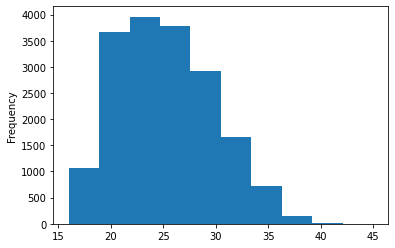

In [73]:
fifa_df.Age.plot.hist(bins=10)

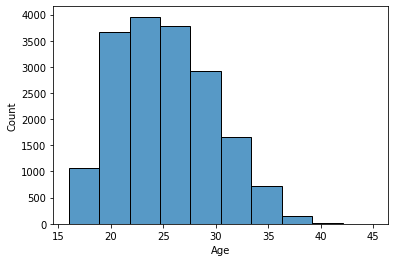

In [74]:
import seaborn as sns
sns.histplot(data=fifa_df.Age,bins=10)

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

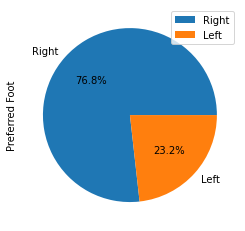

In [75]:
fifa_df['Preferred Foot'].value_counts().to_frame().plot.pie(y='Preferred Foot',autopct='%1.1f%%')


### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

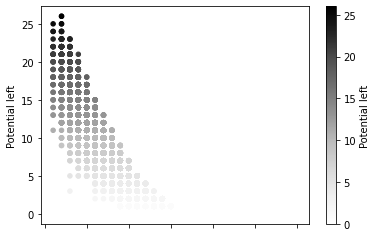

In [82]:
fifa_df.plot.scatter(x='Age',y='Potential left',c='Potential left')

¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano. 

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades? 

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [100]:
import numpy as np
def euclidean_distance(P, Q):
    """
    Calcula la distancia euclidiana entre los elementos de P y Q
    """
    e_distance = np.sqrt(np.sum((P-Q)**2,axis=1))
    return e_distance

def closest_point(X, representatives):
  """
  Devuelve un arreglo con la etiqueta del elemento mas cercano
  para cada ejemplo en X

  X -  el arreglo con los ejemplos
  representatives - el arreglo con los elementos representativos de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Numero de clases
  classes = representatives.shape[0]

  # Distancias minimas
  min_distances = np.full(m, np.inf)
  # El indice de la mejor distancia
  best = np.zeros((X.shape[0]), dtype=np.int8)

  for i in range(len(X)):
    best[i] = np.argmin(euclidean_distance(X[i],class_representatives))
    
  return best

In [121]:
vector = ['Shooting','Defense','Passing','Physical','Control','Mental','GoalKeeping']
predict=[]
# 1er Objetivo: encontrar el vector representativo por Position
rep_df = fifa_df.groupby('Position')[vector].agg('mean')
rep_df['clase'] = range(len(rep_df.index))
# 2 Construir [X,y]
X = fifa_df[['Shooting','Defense','Passing','Physical','Control','Mental','GoalKeeping','Position']]
# 3 Objetivo: calcular la distancia euclidiana entre cada uno de los datos de Position y los representativos
Q = rep_df[vector].values
y = rep_df.index

for i in range(len(X)):
  P = X[vector].iloc[i].values
  distancias = euclidean_distance(P,Q)
  # 4 Obtener el indice de la distancia mas pequeña
  minimo = np.argmin(distancias)
  # 5 Obtener el valor de la etiqueta en función del indice minimo
  predict.append(y[minimo])

X['Predict'] = predict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [126]:
b = X['Position'].values == X['Predict'].values
precision = np.sum(b*1)/len(X['Position'].values)
precision

0.3207389217546601

In [122]:
X

,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Position,Predict
0,86.0,41.0,87.0,80.0,96.0,95.0,11.0,Right Forward (RF),Left Forward (LF)
1,74.0,46.0,78.0,77.0,91.0,84.0,8.0,Right Forward (RF),Left Forward (LF)
2,79.0,46.0,78.0,69.0,78.0,82.0,12.0,Right Forward (RF),Left Forward (LF)
3,80.0,49.0,73.0,73.0,75.0,78.0,11.0,Right Forward (RF),Right Forward (RF)
4,70.0,32.0,72.0,72.0,77.0,72.0,9.0,Right Forward (RF),Left Attacking Midfielder (LAM)
...,...,...,...,...,...,...,...,...,...
17913,36.0,51.0,52.0,71.0,63.0,43.0,11.0,Left Wing Back (LWB),Right Wing Back (RWB)
17914,48.0,46.0,55.0,67.0,66.0,51.0,8.0,Left Wing Back (LWB),Right Midfielder (RM)
17915,30.0,49.0,34.0,67.0,43.0,38.0,10.0,Left Wing Back (LWB),Center Back (CB)
17916,32.0,53.0,41.0,65.0,59.0,44.0,11.0,Left Wing Back (LWB),Center Back (CB)


In [112]:
rep_df

,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,clase
Position,,,,,,,,
Center Back (CB),39.440707,57.958381,47.750285,61.099202,49.531927,51.751425,10.505701,0
Center Forward (CF),59.270270,35.932432,57.432432,68.445946,70.081081,62.148649,9.878378,1
Central Attacking Midfielder (CAM),58.210970,44.566456,63.239451,66.476793,69.940928,63.670886,10.489451,2
Central Defensive Midfielder (CDM),50.778846,61.333333,61.315171,65.305556,63.266026,61.259615,10.577991,3
Central Midfield (CM),52.965142,55.779956,62.090777,65.426289,65.816993,61.179375,10.433551,4
Goalkeeper (GK),15.380522,14.323293,22.441265,44.127510,25.601908,47.028112,63.721386,5
Left Attacking Midfielder (LAM),62.476190,40.238095,68.285714,69.904762,73.857143,70.142857,10.666667,6
Left Back (LB),47.332567,61.746360,60.037548,69.247510,64.360920,57.204598,10.503448,7
Left Center Back (LCB),42.695447,61.927786,53.284144,63.262166,53.058085,56.555730,10.599686,8
